In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

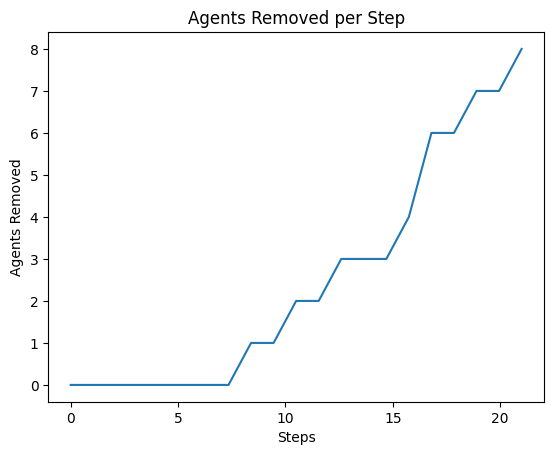

In [3]:
# Load the data from the CSV file
data = pd.read_csv("agents_removed_per_step.csv")

# prepare the data for plotting
steps = np.linspace(0, len(data), len(data))

# visualize the data
plt.plot(steps, data["Agents Removed"])
plt.xlabel("Steps")
plt.ylabel("Agents Removed")
plt.title("Agents Removed per Step")
plt.show()

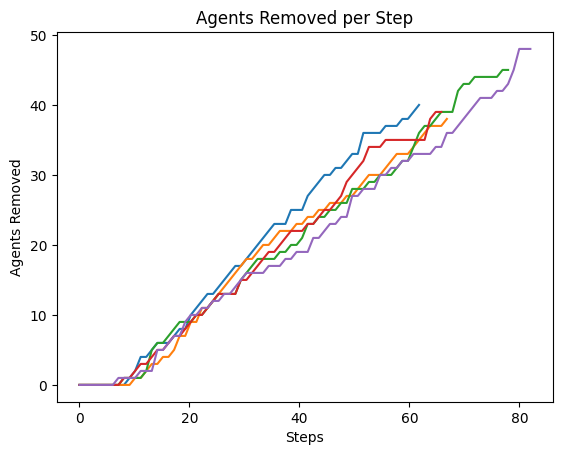

In [4]:
# Load the data from the CSV file
data = pd.read_csv("agents_removed_per_step_all_runs.csv")

for i in range(len(data.columns)):
    # prepare the data for plotting taking column i
    steps = np.linspace(0, len(data.iloc[:, i]), len(data.iloc[:, i]))

    # visualize the data
    plt.plot(steps, data.iloc[:, i])

plt.xlabel("Steps")
plt.ylabel("Agents Removed")
plt.title("Agents Removed per Step")
    
plt.show()

In [5]:
from IPython.display import clear_output
import SALib
clear_output()
print("Everything imported!")

Everything imported!


In [6]:
%matplotlib inline
from SALib.sample import saltelli
from mesa.batchrunner import batch_run
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [15]:
import numpy as np
from mesa.batchrunner import batch_run
from model import CrowdModel  # Assuming your model is defined in model.py
import pandas as pd

# Define the problem and bounds for parameters
problem = {
    'num_vars': 3,
    'names': ['fire_radius', 'social_radius', 'p_spreading'],
    'bounds': [[1, 5], [1, 5], [0.1, 0.9]]  # Define reasonable bounds based on your model
}

# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 30
max_steps = 100
distinct_samples = 10

# Set the model reporters for data collection
model_reporters = {
    "Agents Removed": lambda m: m.num_agents_removed,
    "Steps": lambda m: m.schedule.steps
}

# Initialize an empty dictionary to hold the data frames for each parameter
data_frames = {}

for var_index, var_name in enumerate(problem['names']):
    # Get the bounds for this variable and generate <distinct_samples> samples within this space (uniform)
    samples = np.linspace(*problem['bounds'][var_index], num=distinct_samples)
    
    # Create a list of parameter sets for batch runs
    parameter_sets = [{var_name: sample,
                       'width': 20,
                       'height': 20,
                       'N': 100,
                       'goal_radius': 10,
                       'fire_locations': [[0,0], [0,1], [0,2]],
                       'exits': [
                           {"location": (0, 19), "radius": 10},
                           {"location": (19, 0), "radius": 2},
                           {"location": (19, 19), "radius": 2}
                       ]}
                      for sample in samples]
    
    # Run the batch for the current variable using batch_run
    batch_results = batch_run(
        CrowdModel,
        variable_parameters={var_name: samples},
        fixed_parameters={'height': 20,
                           'width': 20,
                           'N': 100,
                           'goal_radius': 10,
                           'fire_locations': [[0,0], [0,1], [0,2]],
                           'exits': [
                               {"location": (0, 19), "radius": 10},
                               {"location": (19, 0), "radius": 2},
                               {"location": (19, 19), "radius": 2}
                           ]},
        iterations=replicates,
        max_steps=max_steps,
        model_reporters=model_reporters,
        display_progress=True
    )
    
    # Convert batch results to DataFrame and store in data_frames
    data_frames[var_name] = pd.DataFrame(batch_results)

# Combine all DataFrames into one for each variable
for var_name in problem['names']:
    data_frames[var_name]['parameter'] = var_name

# Combine all DataFrames into one for all variables
final_df = pd.concat(data_frames.values(), ignore_index=True)


TypeError: batch_run() got an unexpected keyword argument 'variable_parameters'